# Transformation of features
- there are some algorithums.
- 1. Linear regression---Gradient descent---Global minima
  - main aim is to find coefficient parameters
  - for this we require gradient decients require globlal minima
  - to derive it faster we use feature transformation

  2. KNN, K mean, Hriarichal Clustring
  - works on uclideans distance
  - try to find neares point
  - it will either classify them
  - either if we are finding regressing it will find the average

problem
lets us having two features
[f1 f2],
[24 56],
[21 100],
[45 67],

solution
- we can see these values are larges if we simulate any model with them it will go to very large scale in terms of values and distance.
- to avoid this we scale down the features to lower values
- this will make a compact model
- it makes process of making model very faster.

solution
slaling down the features f1 and f2 between 0 to 1(min max scaling)

- every point have vector and distance.

## Every machine learning model required transformation?
# No
- some algorithms like linear regression, logistic regression, KNN, K mean hirerarchical clustring require feature scaling because of the uclideans distance and for making process more efficient.

## Do we require transformation in decision trees, random forest, xgboost, adaboost and techniques which use ensemble technique of decisiontrees?
# No
- decision tree spliting happens based on the values we dont require transformation.

# Deep learning technoques (Standardization, Scaling)
1. ANN--->Global minima, Gradient deasent
2. CNN
3. RNN

- Ex., in image classification every pixel having the value between 0 to 255 so we divide each value by 255 so we get values between 0 to 1.

# Types of transformation
1. Normilization and Standardization
2. Scaling to Minimum and Maximum values
3. Scaling to Median and Quantiles
4. Gaussian Transformation
   - Logarithmic transformation
   - Reciprocal transformation
   - Square root transformation
   - Exponential transformation
   - Box Cox transformation

### RobustScaler
-  uses median and IQR to handle outliers while maintaing data's shape.
### StandardScaler
- adjusts data to have a mean of 0 and standard deviation of 1 but it is sensitive to outliers.
### MinMaxScaler
- scales data to a fixed range ([0, 1]) but extreme values can effect results.
#### Each scaler works best in specific situations:
-Choosing right scaler depends on characteristics of data and algorithm being used. By understanding their strengths and limitations we can preprocess data effectively and build stronger machine learning models.

# Standerdization
- Wr try to bring all the variables or features to a similar scale.
- standerdization means centring the variavles at zero

### z=(x-x_mean)/std

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [3]:
df.fillna({'Age':df.Age.median()},inplace=True)

In [4]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
# standarisation : We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

# fit vs fit_transform
# fit()
- Purpose: Learns the internal parameters from the dataset (e.g., mean/variance for StandardScaler, eigenvalues for PCA).
- Usage: estimator.fit(X_train).
- When to use: Only on training data to establish the transformation rules. 
# transform()
- Purpose: Applies the learned transformation using the parameters from the fit() step to modify the data.
- Usage: transformed_data = estimator.transform(X_test).
- When to use: On test/new data (or training data after fitting) to apply the same transformation, preventing data leakage. 
# fit_transform()
- Purpose: A convenient shortcut for fit() followed immediately by transform() on the same dataset.
- Usage: transformed_data = estimator.fit_transform(X_train).
- When to use: On training data for preprocessing to learn parameters and transform the data in one go, improving efficiency. 
# Key Difference & Why it Matters
- Efficiency: fit_transform() is generally faster and more memory-efficient for training data as it avoids creating intermediate data structures.
- Data Leakage: Using fit() on test data (or fit_transform() on test data) is a major error, as the model learns from unseen data, leading to inflated performance metrics and poor real-world results (overfitting).
# Key Takeaways: 
- Larger Eigenvalues = More Variance: A large eigenvalue means the component represents a significant, "stretched" direction in the data's spread.
- PCA Goal: Maximize the variance, which means prioritizing the largest eigenvalues.
- Dimensionality Reduction: By selecting only the top \(k\) components (highest eigenvalues), you reduce the data's dimensionality while keeping the most important information. 

In [6]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [9]:
df_scaled  # first it is in the list format we convert it into table using pandas DataFrame.

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]],
      shape=(891, 4))

In [10]:
# convert to data frame
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

## Pclass column transformation

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 20 artists>)

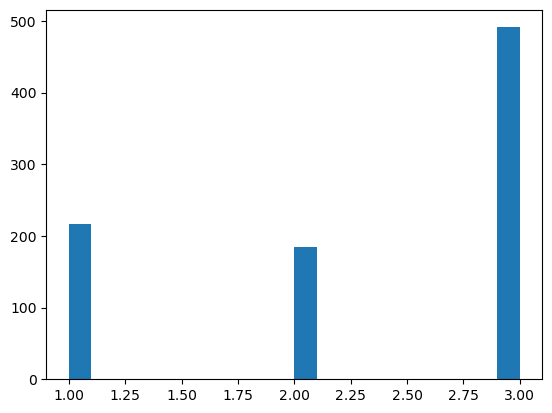

In [17]:
plt.hist(df['Pclass'],bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

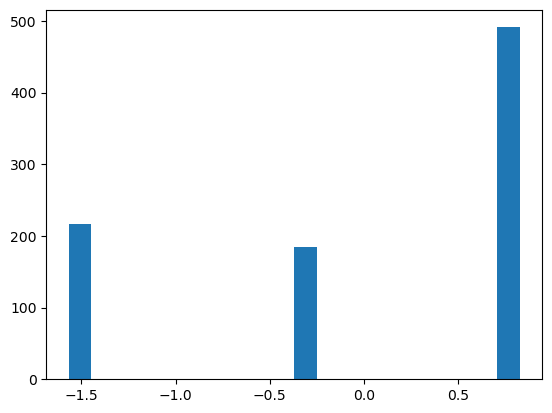

In [12]:
# in the real data this is Pclass
plt.hist(df_scaled[:,1],bins=20)

### results for Pclass
- we take the p class from 1 - 3 to -1.5 - 0.6

## Age column transformation

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

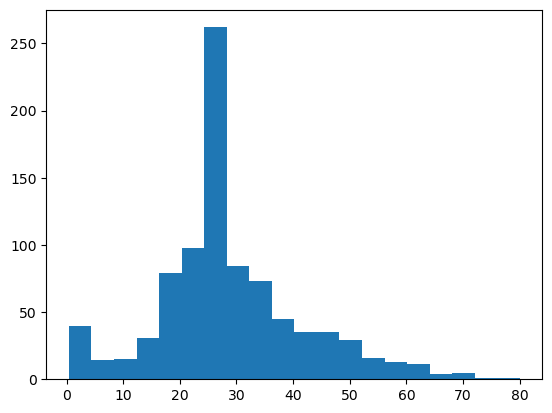

In [19]:
# for original age column
plt.hist(df['Age'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

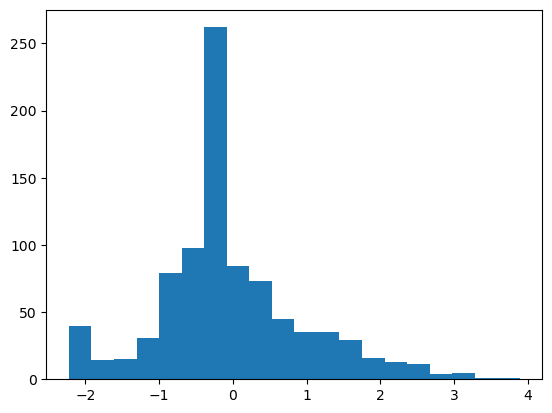

In [18]:
# for second indix age
plt.hist(df_scaled[:,2],bins=20)

### Results for Age column
- we are taken down values to low and graph is normally distributed both the times.

## for Fare column

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

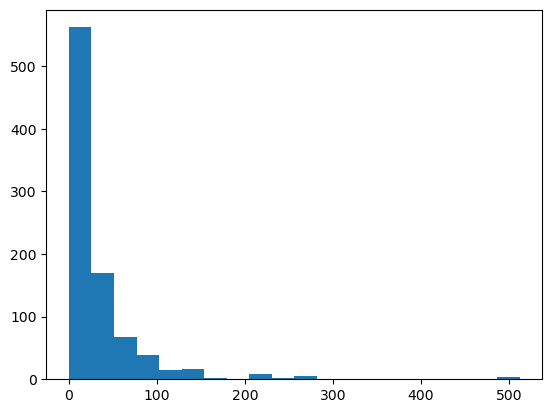

In [20]:
# from original data set
plt.hist(df['Fare'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

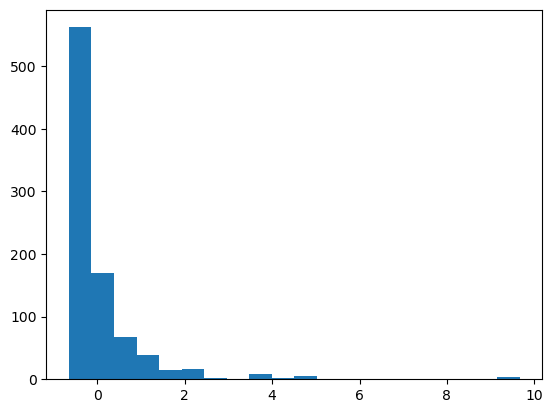

In [21]:
# for transformed data
plt.hist(df_scaled[:,3],bins=20)

### results on fare column
- the graph is right skiwed because there are outliers.

<Axes: ylabel='Age'>

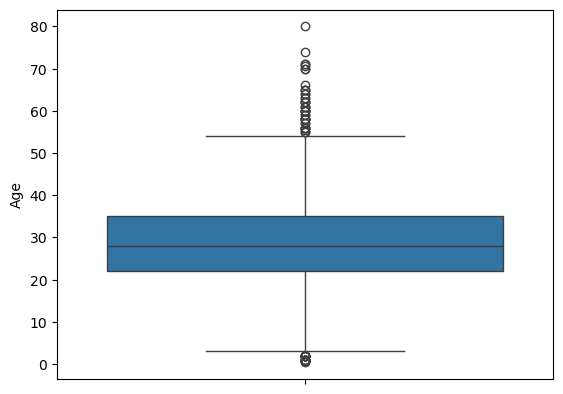

In [22]:
# checking for outliers
import seaborn as sns
sns.boxplot(df['Age'])

- we can see there are many outliers.

# imp note
##### if there are outliers in the data set then there will be large impact on the transformed data and model.